In [1]:
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


model = load_model('i_predict 180℃')

In [2]:
sc = StandardScaler()

In [4]:
df_aa = pd.read_csv('current density 180℃ 0.4-0.9V_std', usecols=[1,2,3,4])

In [6]:
df_a = df_aa.head(1014)
df_a

,x座標,y座標,V[V],i[A/m^2]
0,1.731677,1.631508,-1.792252,0.646158
1,1.733163,1.627214,-1.792252,0.646158
2,-1.723002,1.693937,-1.792252,0.646158
3,-1.721035,1.691086,-1.792252,0.646158
4,1.754765,1.563305,-1.792252,0.646158
...,...,...,...,...
1009,0.973655,-1.635120,-1.792252,2.441496
1010,-1.008538,-1.572300,-1.792252,2.441496
1011,0.948858,-1.697939,-1.792252,2.441496
1012,-0.940056,-1.635120,-1.792252,2.441496


In [14]:
df_ab = pd.read_csv('current density 180℃ 0.4-0.9V', usecols=[1,2,3,4])
df_c  = df_ab.head(1014)
df_c

,x座標,y座標,V[V],i[A/m^2]
0,0.000734,0.010441,0.4,19224.406968
1,0.000734,0.010428,0.4,19224.406968
2,0.000061,0.010637,0.4,19224.406968
3,0.000062,0.010628,0.4,19224.406968
4,0.000738,0.010227,0.4,19224.406968
...,...,...,...,...
1009,0.000586,0.000197,0.4,33523.116672
1010,0.000200,0.000394,0.4,33523.116672
1011,0.000582,0.000000,0.4,33523.116672
1012,0.000214,0.000197,0.4,33523.116672


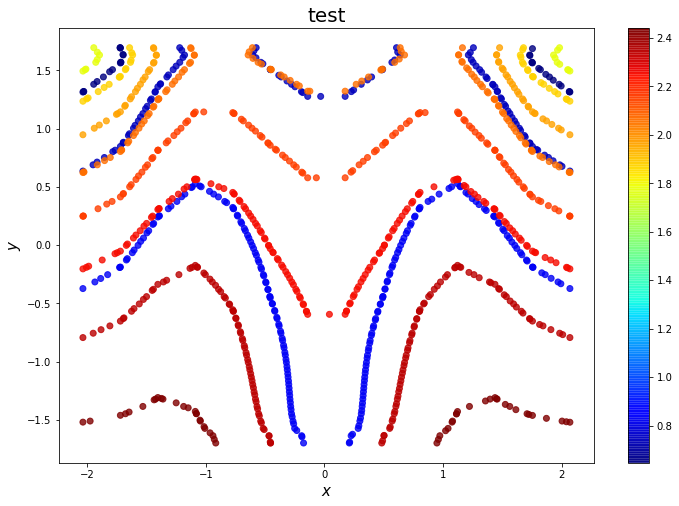

In [9]:
plt.figure(figsize=(12, 8)) #正規化されてるグラフ

plt.scatter(df_a['x座標'], df_a['y座標'], c=df_a['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar()

plt.title("test", fontsize=20)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.show()

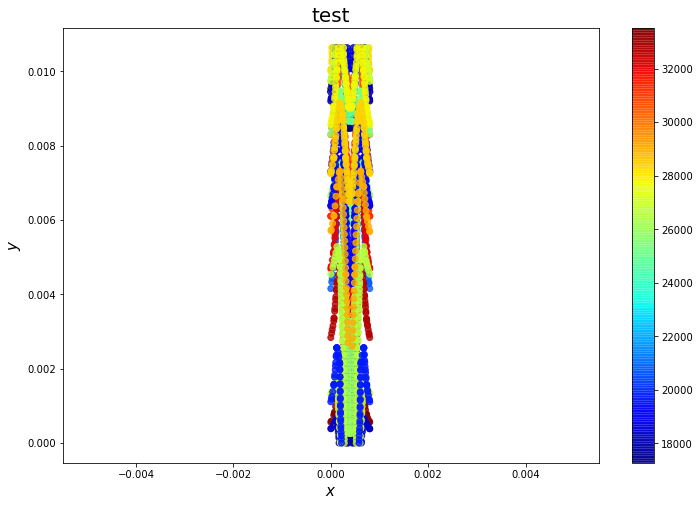

In [12]:
plt.figure(figsize=(12, 8)) #正規化されてないグラフ

plt.scatter(df_c['x座標'], df_c['y座標'], c=df_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar()

plt.title("test", fontsize=20)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.xlim(-0.0055,0.0055)

plt.show()

In [13]:
df_v = df_aa.loc[:,'V[V]']
v_mean = df_v.mean()
v_std = df_v.std()
print(v_mean)
print(v_std)

6.995036931033135e-16
1.0000384578406065


In [ ]:
#predictで正規化された出力求める→全てのパラメータを正規化から戻す

In [89]:
#v_a =   np.array(v)*v_std + v_mean 

In [90]:
#v_a

In [15]:
df_pre = pd.read_csv('current density 180℃ 0.4-0.9V', usecols=[1,2,3])

In [16]:
df_i_pre = pd.DataFrame(model.predict(df_pre), columns = ['i[A/m^2]'])

In [17]:
df_i_pre

,i[A/m^2]
0,-0.852873
1,-0.852874
2,-0.852850
3,-0.852852
4,-0.852895
...,...
12997,-1.142579
12998,-1.142571
12999,-1.142592
13000,-1.142580


In [18]:
df = pd.concat([df_pre, df_i_pre], axis=1)

In [19]:
df_b = df.head(2451)
df_b

,x座標,y座標,V[V],i[A/m^2]
0,0.000734,0.010441,0.40,-0.852873
1,0.000734,0.010428,0.40,-0.852874
2,0.000061,0.010637,0.40,-0.852850
3,0.000062,0.010628,0.40,-0.852852
4,0.000738,0.010227,0.40,-0.852895
...,...,...,...,...
2446,0.000346,0.003079,0.45,-0.888517
2447,0.000449,0.002815,0.45,-0.888544
2448,0.000350,0.002893,0.45,-0.888536
2449,0.000445,0.002607,0.45,-0.888565


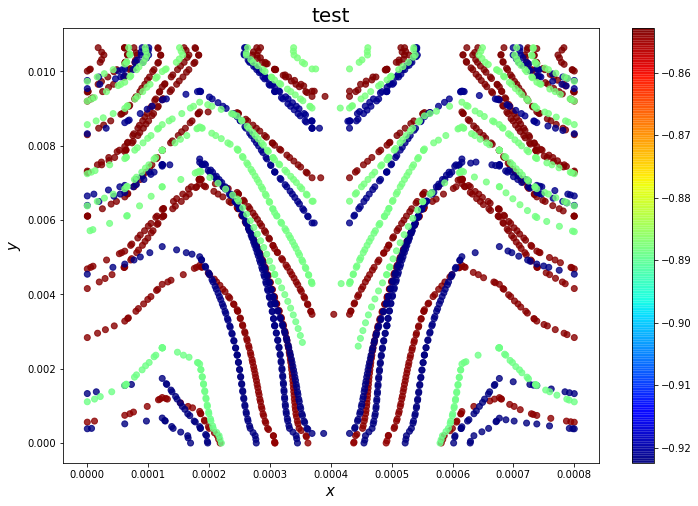

In [20]:
plt.figure(figsize=(12, 8))

plt.scatter(df_b['x座標'], df_b['y座標'], c=df_b['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar()

plt.title("test", fontsize=20)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.show()

In [27]:
df_i = pd.read_csv('current density 180℃ 0.4-0.9V', usecols=[4]).head(1014)

In [28]:
df_i.mean()

i[A/m^2]    27685.924114
dtype: float64

In [29]:
df_i.std()

i[A/m^2]    5409.21132
dtype: float64

In [30]:
df_i_re = df_i_pre*df_i.std() + df_i.mean()  #iの予測値の標準化を戻す
df_i_re

,i[A/m^2]
0,23072.555938
1,23072.548844
2,23072.675553
3,23072.670072
4,23072.435355
...,...
12997,21505.471139
12998,21505.516921
12999,21505.400208
13000,21505.467270


In [31]:
df_i_re_c = df_i_re.head(1014)

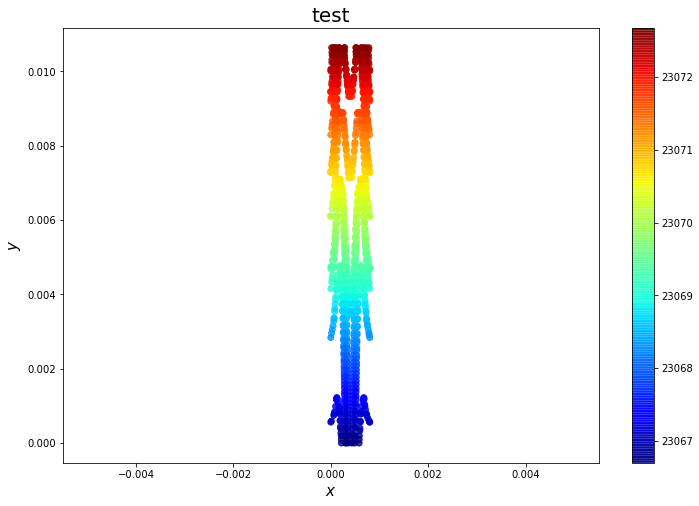

In [32]:
plt.figure(figsize=(12, 8))

plt.scatter(df_c['x座標'], df_c['y座標'], c=df_i_re_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar()

plt.title("test", fontsize=20)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.xlim(-0.0055,0.0055)

plt.show()